## Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from pathlib import Path

## Load dataset

In [ ]:
path = Path().cwd()
data_file = path.parent / "Data" / "Actors.csv"

T = pd.read_csv(data_file, delimiter = ",")
# One hot encoding of actor
# This is unfortuanate necessary because sklearn only handles numerical features
T = pd.get_dummies(T,prefix=['Actor'])

Index(['Budget', 'IMDb', 'Actor_AP', 'Actor_NC', 'Actor_SJ'], dtype='object')


### 1. The first few exercises concern the fictitious movie dataset below. A real database with information on movies and TV-series is available in different formats from http://www.imdb.com/interfaces. The goal here is to predict the user rating of an upcoming movie as soon as the information on cast and budget is known, and to be able to explain in words why the movie will go straight to the Oscar's - or straight to oblivion.

| Observation  | Actor               | Budget ($ million)  | IMDB User Rating  |
|------        |------               |------               |------             |
| 1            | Nicholas Cage       | 100                 | 2.8               |
| 2            | Scarlett Johanson   |  50                 | 8.3               |
| 3            | Scarlett Johanson   | 150                 | 4.0               |
| 4            | Nicholas Cage       |  20                 | 2.9               |
| 5            | Al Pacino           |  75                 | 7.8               |
| 6            | Al Pacino           | 150                 | 8.1               |
| 7            | Al Pacino           | 115                 | 3.0               |
| 8            | Nicholas Cage       | 115                 | 3.0               |

> a) Is the described problem a classification or regression problem? Motivate your answer.

Regression since it is a continuous value (IMDB rating)

> b) Which input variables are categorical and which are continuous?

actor is categorical and budget and imdb rating are continuous

> c) For a categorical variable with k unique categories, what is the number of possible splits into two groups? Note that empty groups are not allowed, and that groupings are commutative in the sense that e.g. the split $\{1,2,3\},\{4,5\}$ is equal to the split $\{4,5\},\{1,3,2\}$.

$2^{k-1}-1$

> d) What is the total number of splits to investigate at the root node for the movie dataset?

we have 3 actors and 6 unique budgets thus 3+6-1=8 

> e) Build a tree that predicts IMDb ratings.

In [11]:
# create a decisiontreeregressor/classifier
dtree =  DecisionTreeRegressor()
x = T.drop(columns = ['IMDb']).to_numpy()
y = T['IMDb'].to_numpy()
dtree.fit(x,y)
print(x)
# Fit the tree regressor/classifier

[[100 False True False]
 [50 False False True]
 [150 False False True]
 [20 False True False]
 [75 True False False]
 [150 True False False]
 [115 True False False]
 [115 False True False]]


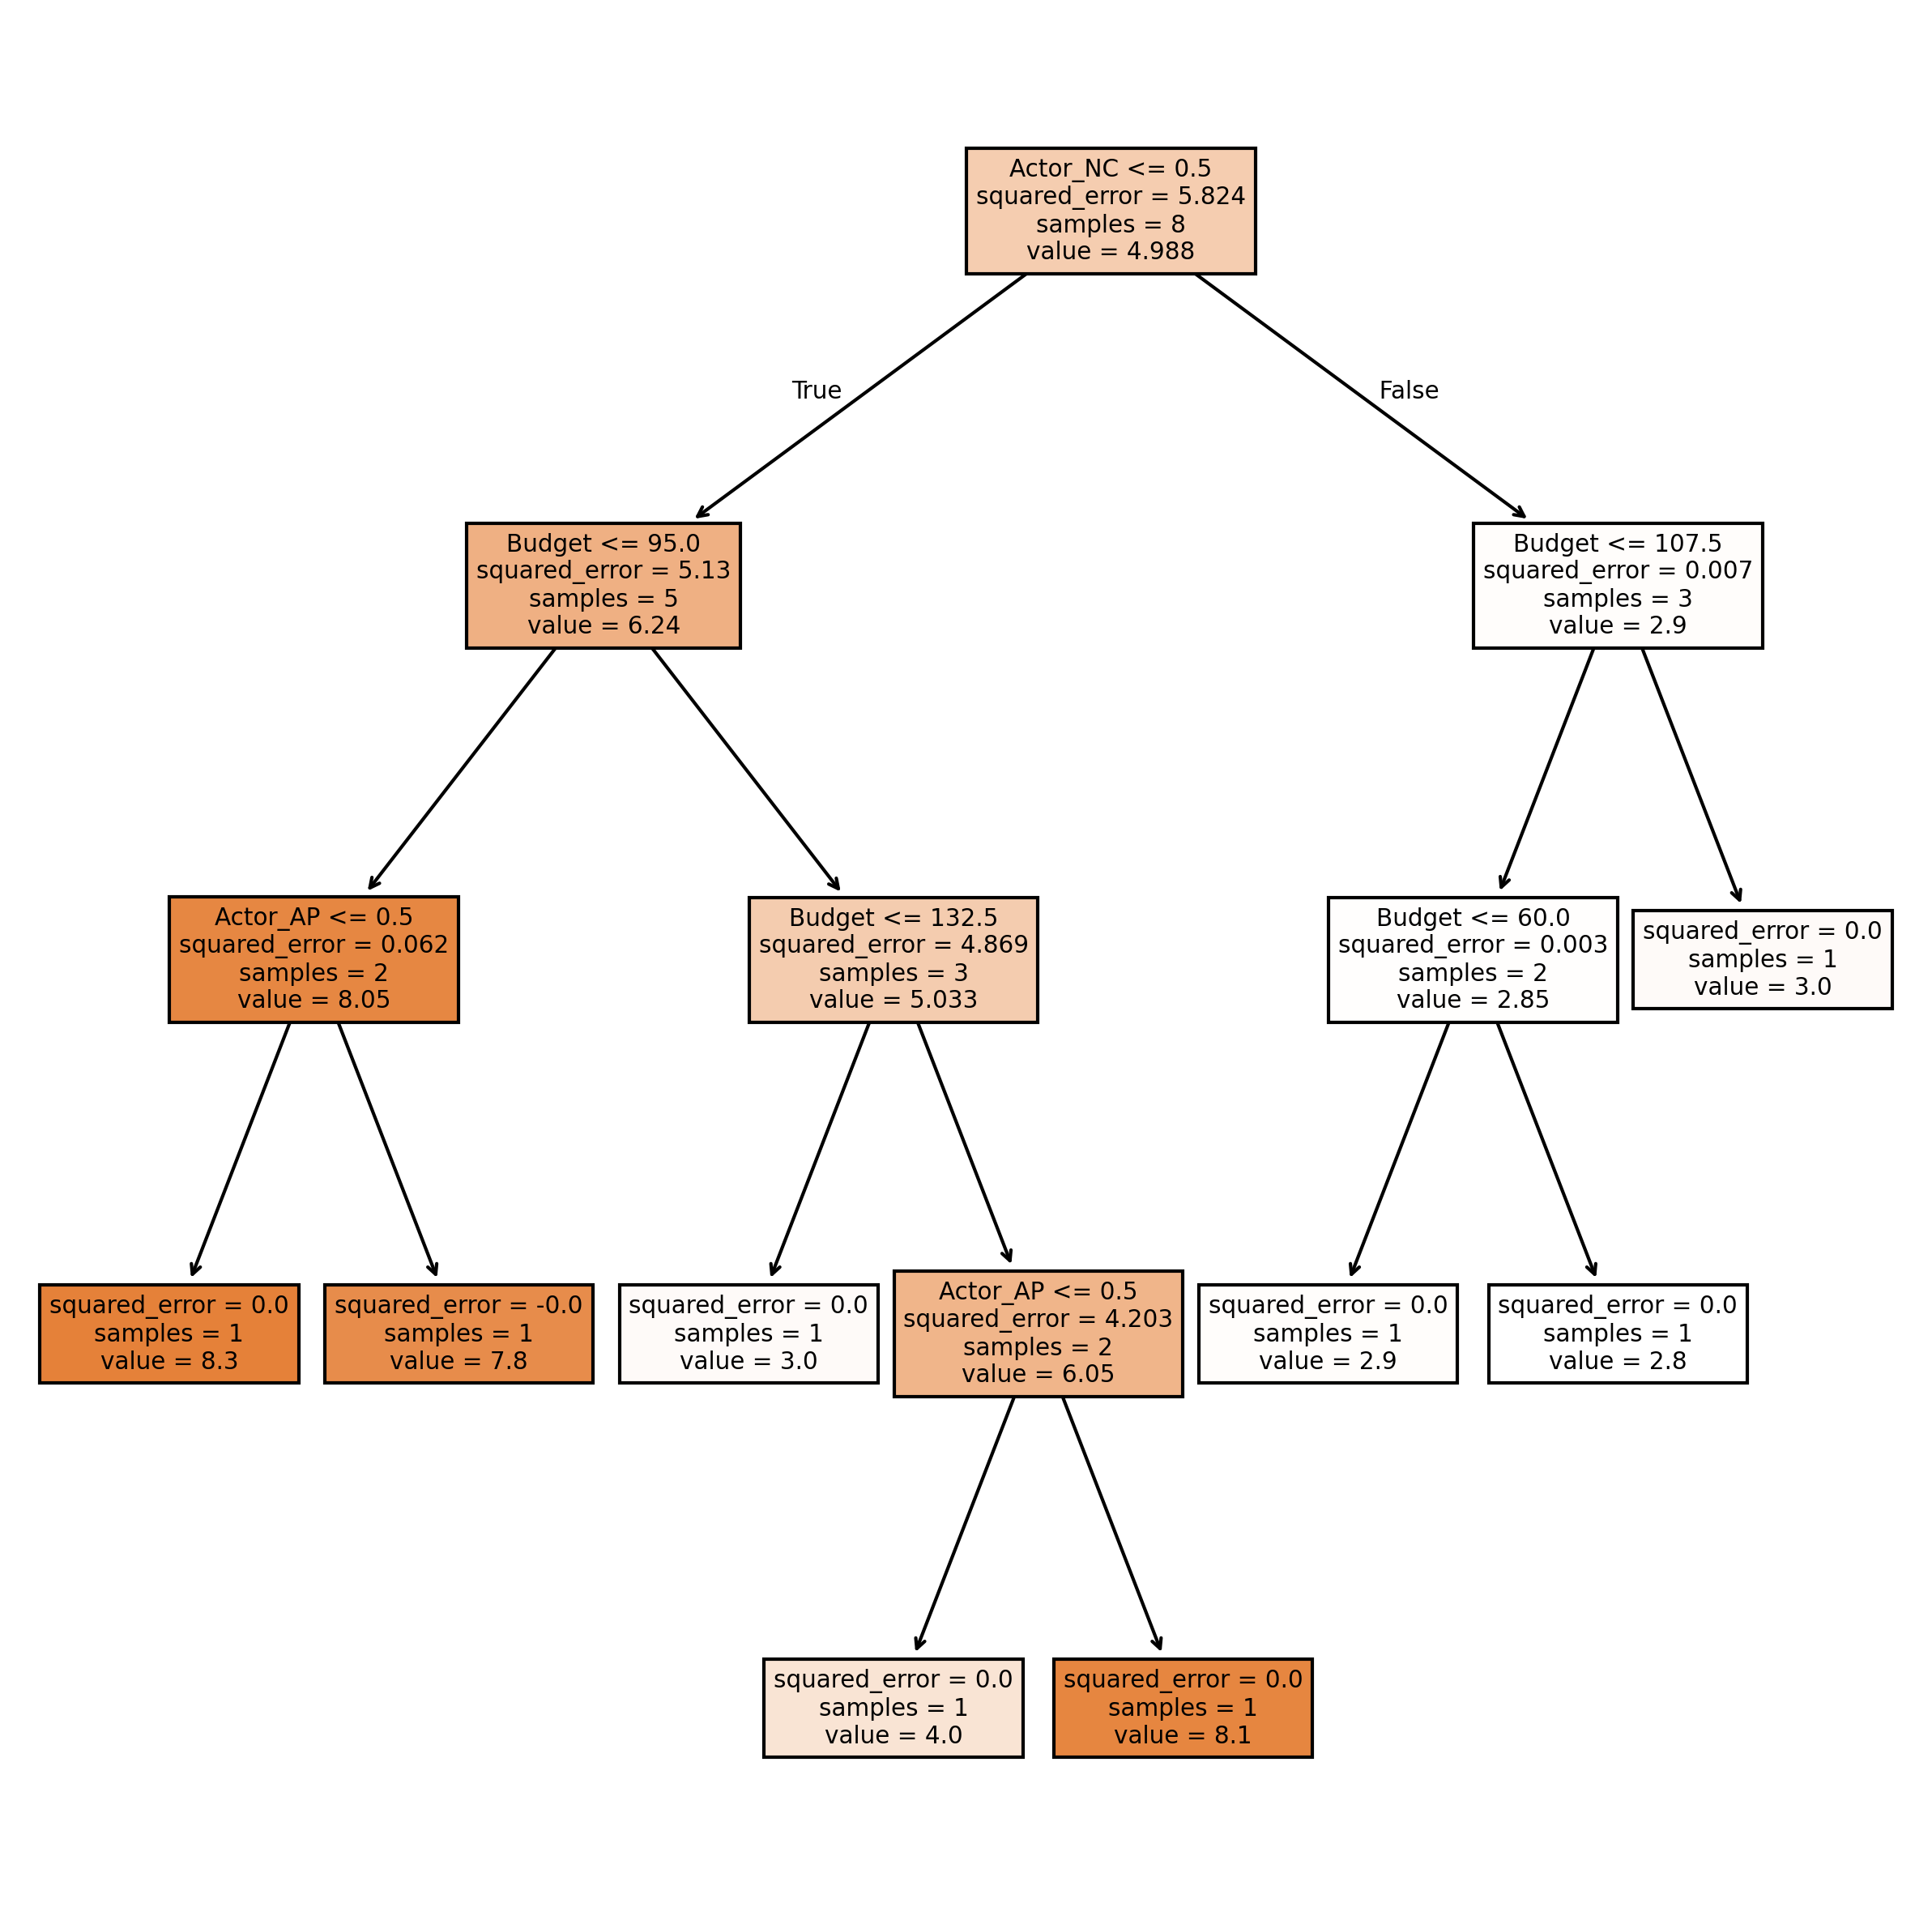

In [10]:
feature_names=['Budget',"Actor_AP", 'Actor_NC','Actor_SJ']

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=300)
tree.plot_tree(dtree,
               feature_names = feature_names,
               filled = True);